### Computational Biology Qualification

#### Data Preparing

In [3]:
def read_fasta(file_path):
    sequences = []
    with open(file=file_path, mode="r") as file:
        seq = []
        for line in file:
            line = line.strip()
            if line.startswith(">"):
                if seq:
                    sequences.append("".join(seq))
                seq = []
            else:
                seq.append(line)
        if seq:
            sequences.append("".join(seq))
    return sequences
    

In [13]:
FILE_A_PATH = './dataset/sequence.txt'
FILE_B_PATH = './dataset/sequence.fasta'

sequence_A = read_fasta(FILE_A_PATH)
sequence_B = read_fasta(FILE_B_PATH)
sequence_C = sequence_A[:5] + sequence_B[-5:]

#### Computational Biology

In [34]:
import numpy as np

import matplotlib.pyplot as plt

from Bio.Seq import Seq
from Bio.SeqUtils import GC
from Bio.SeqUtils import MeltingTemp as mt
from Bio.SeqUtils import molecular_weight as mw

# Define the sequences as Seq objects
sequence_A = Seq("".join(sequence_A))
sequence_B = Seq("".join(sequence_B))
sequence_C = Seq("".join(sequence_C))

In [ ]:
## 1. Sequence String Manipulation

def get_length(sequence):
    return len(sequence)

def get_reverse_sequence(sequence):
    return sequence[::-1]

def get_split_sequence(sequence, split_length):
    return [sequence[i:i+split_length] for i in range(0, len(sequence), split_length)]

def get_nucleotide_frequency(sequence, nucleotide="ATGC"):
    return {nucleotide: sequence.count(nucleotide) for nucleotide in nucleotide}

def get_nucleotide(sequence, index):
    return sequence[index] if index < len(sequence) else None

# Execute the functions
print("Length of sequence A:", get_length(sequence_A))
print("Reversed sequence A:", get_reverse_sequence(sequence_A))
print("Split sequence A:", get_split_sequence(sequence_A, 10))
print("Nucleotide frequency of sequence A:", get_nucleotide_frequency(sequence_A))
print("Nucleotide at index 10 of sequence A:", get_nucleotide(sequence_A, 10))

In [25]:
## 2. Melting Temperature Calculation

melting_temp_A = mt.Tm_Wallace(sequence_A)
melting_temp_B = mt.Tm_Wallace(sequence_B)
melting_temp_C = mt.Tm_Wallace(sequence_C)

print("Melting temperature of sequence A:", melting_temp_A)
print("Melting temperature of sequence B:", melting_temp_B)
print("Melting temperature of sequence C:", melting_temp_C)

Melting temperature of sequence A: 11423048.0
Melting temperature of sequence B: 40664.0
Melting temperature of sequence C: 57418.0


In [29]:
## 3. Molecular Weight Calculation

molecular_weight_A = mw(sequence_A, seq_type="DNA")
molecular_weight_B = mw(sequence_B, seq_type="DNA")
molecular_weight_C = mw(sequence_C, seq_type="DNA")

print("Molecular weight of sequence A:", molecular_weight_A)
print("Molecular weight of sequence B:", molecular_weight_B)
print("Molecular weight of sequence C:", molecular_weight_C)

Molecular weight of sequence A: 1049168735.0313228
Molecular weight of sequence B: 4702327.4559002975
Molecular weight of sequence C: 6276362.86360062


In [32]:
## 4. GC & AT Content Calculation
def get_ATCG_content(sequence):
    gc_content = GC(sequence)
    at_content = 100 - gc_content
    return gc_content, at_content

gc_content_A, at_content_A = get_ATCG_content(sequence_A)
gc_content_B, at_content_B = get_ATCG_content(sequence_B)
gc_content_C, at_content_C = get_ATCG_content(sequence_C)

print(f"GC content of sequence A: {gc_content_A:.2f}% | AT content of sequence A: {at_content_A:.2f}%")
print(f"GC content of sequence B: {gc_content_B:.2f}% | AT content of sequence B: {at_content_B:.2f}%")
print(f"GC content of sequence C: {gc_content_C:.2f}% | AT content of sequence C: {at_content_C:.2f}%")

GC content of sequence A: 68.11% | AT content of sequence A: 31.89%
GC content of sequence B: 33.60% | AT content of sequence B: 66.40%
GC content of sequence C: 41.35% | AT content of sequence C: 58.65%


In [33]:
## 5. Frequency of Nuclotide base in sequence
def get_nucleotide_frequency(sequence):
    return {
        "A": sequence.count("A"),
        "T": sequence.count("T"),
        "G": sequence.count("G"),
        "C": sequence.count("C")
    }
    
freq_A = get_nucleotide_frequency(sequence_A)
freq_B = get_nucleotide_frequency(sequence_B)
freq_C = get_nucleotide_frequency(sequence_C)

print("Frequency of nucleotide base in sequence A:", freq_A)
print("Frequency of nucleotide base in sequence B:", freq_B)
print("Frequency of nucleotide base in sequence C:", freq_C)

Frequency of nucleotide base in sequence A: {'A': 549941, 'T': 533721, 'G': 1134881, 'C': 1179050}
Frequency of nucleotide base in sequence B: {'A': 5890, 'T': 4216, 'G': 2410, 'C': 2703}
Frequency of nucleotide base in sequence C: {'A': 6817, 'T': 5094, 'G': 4068, 'C': 4331}


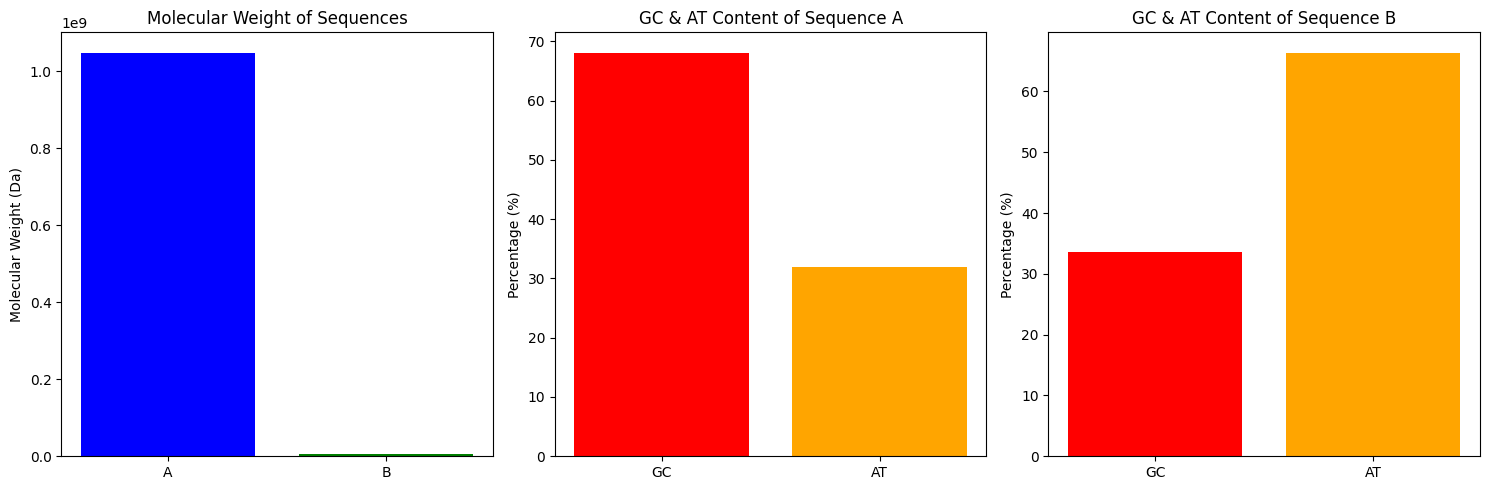

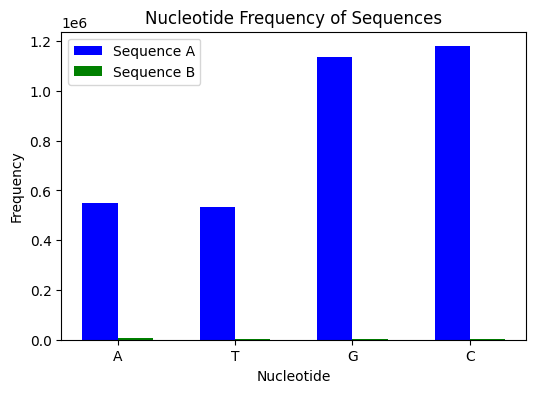

In [36]:
## 6. Plotting the molecular weight, GC & AT content, and nucleotide frequency of the sequences
nucleotides = list("ATGC")
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# (1) Plotting molecular weight
axes[0].bar(["A", "B"], [molecular_weight_A, molecular_weight_B], color=["blue", "green"])
axes[0].set_title("Molecular Weight of Sequences")
axes[0].set_ylabel("Molecular Weight (Da)")

# (2) Plotting GC & AT content
axes[1].bar(["GC", "AT"], [gc_content_A, at_content_A], color=["red", "orange"])
axes[1].set_title("GC & AT Content of Sequence A")
axes[1].set_ylabel("Percentage (%)")

axes[2].bar(["GC", "AT"], [gc_content_B, at_content_B], color=["red", "orange"])
axes[2].set_title("GC & AT Content of Sequence B")
axes[2].set_ylabel("Percentage (%)")

plt.tight_layout()
plt.show()

# (3) Plotting nucleotide frequency
plt.figure(figsize=(6, 4))
x = np.arange(len(nucleotides))
width = 0.3
plt.bar(x - width/2, list(freq_A.values()), width=width, label="Sequence A", color="blue")
plt.bar(x + width/2, list(freq_B.values()), width=width, label="Sequence B", color="green")
plt.xticks(ticks=x, labels=nucleotides)
plt.xlabel("Nucleotide")
plt.ylabel("Frequency")
plt.title("Nucleotide Frequency of Sequences")
plt.legend()
plt.show()

In [ ]:
## 7. mRNA transcription, and amino acid translation
